<a href="https://colab.research.google.com/github/Shashwat-23/Big-Mart-Sales-Prediction/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BigMart Sales Prediction**


## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__






## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

In [ ]:
# import dataset
df=pd.read_csv('/content/sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
X=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [ ]:
SEED=42

##***`Train-Test Split`***

---

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=SEED)

In [ ]:
print(X_train.shape,X_test.shape)

(5966, 11) (2557, 11)


In [ ]:
print(y_train.shape,y_test.shape)

(5966,) (2557,)


In [ ]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


## ***`Data Wrangling + EDA + Feature Engineering`***

In [ ]:
# make a copy of train data to do modifications
x_train_c=X_train.copy()

###*EDA*

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### ***`Extracting numerical featuers`***

In [ ]:
num_data = x_train_c.select_dtypes(exclude=['object'])
num_data.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985


In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
# Import Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

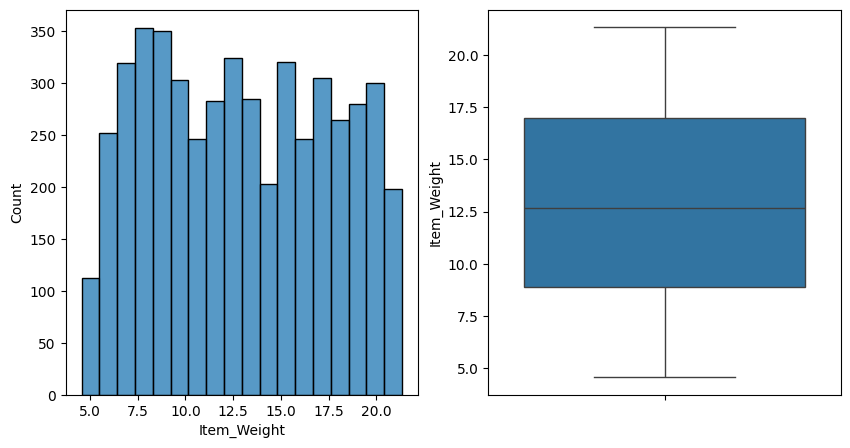

In [ ]:
fig ,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=num_data,x='Item_Weight',ax=ax[0]);
sns.boxplot(data=num_data,y='Item_Weight',ax=ax[1]);
plt.show()

In [ ]:
def visualize_numeric_features(data_frame,col_name):
    fig ,ax=plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data=data_frame,x=col_name,ax=ax[0]);
    sns.boxplot(data=data_frame,y=col_name,ax=ax[1]);

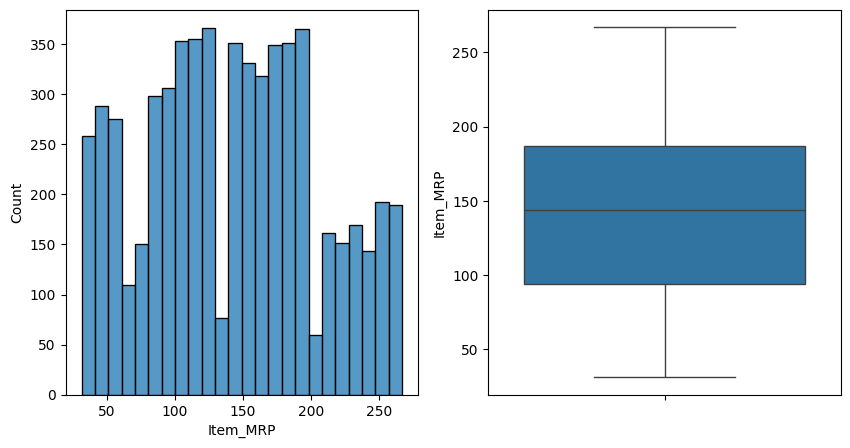

In [ ]:
visualize_numeric_features(x_train_c,'Item_MRP')

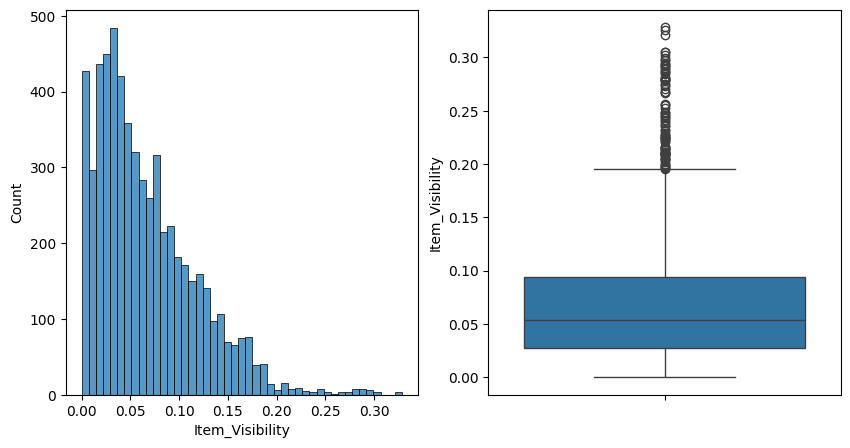

In [ ]:
visualize_numeric_features(x_train_c,'Item_Visibility')

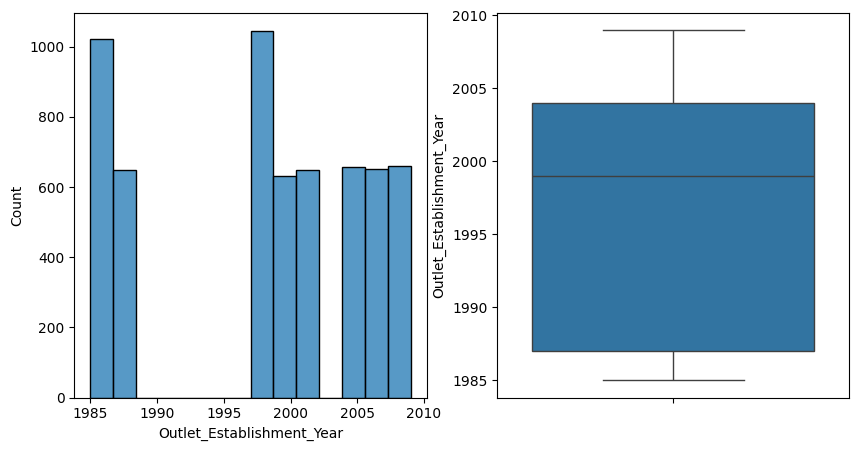

In [ ]:
visualize_numeric_features(x_train_c,'Outlet_Establishment_Year')

<ipython-input-21-0a8d34f269e6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x_train_c,x='Outlet_Establishment_Year',palette="cividis")


<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

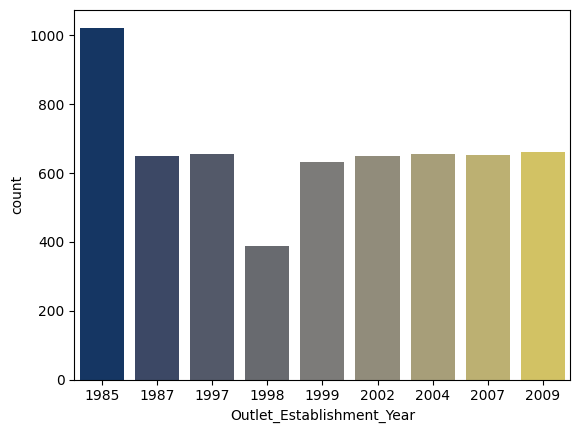

In [ ]:
sns.countplot(data=x_train_c,x='Outlet_Establishment_Year',palette="cividis")

### ***`Extracting categorical featuers`***

In [ ]:
cat_features=x_train_c.select_dtypes(include=['object'])
cat_features.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3


In [ ]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,FDF52,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [ ]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
def valuecount(data_frame,col_name):
  return data_frame[col_name].value_counts()

In [ ]:
valuecount(cat_features,'Item_Identifier')

FDF52    9
NCI54    9
FDH33    8
DRE49    8
FDN56    8
        ..
NCU06    1
FDS39    1
FDD22    1
FDZ02    1
FDT35    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [ ]:
valuecount(cat_features,'Item_Fat_Content')

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [ ]:
valuecount(cat_features,'Item_Type')

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [ ]:
valuecount(cat_features,'Outlet_Identifier')

OUT027    668
OUT018    661
OUT035    656
OUT046    656
OUT017    652
OUT013    649
OUT045    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [ ]:
valuecount(cat_features,'Outlet_Size')

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [ ]:
valuecount(cat_features,'Outlet_Location_Type')

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [ ]:
valuecount(cat_features,'Outlet_Type')

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

##***`Data Wrangling + Feature Engineering`***

####*Step 1:- Create High Level Item Types*

In [ ]:
x_train_c['Item_Identifier'].apply(lambda x:x[:2])

1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object

In [ ]:
x_train_c['Item_Identifier'].apply(lambda x:x[:2]).value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [ ]:
# Step 2:-Map the Item Ids to Item Types
def create_item_type(data_frame):
  data_frame['Item_Type']=data_frame['Item_Identifier'].str[:2]
  data_frame['Item_Type']=data_frame['Item_Type'].map({'FD':"Food",
                                                            'NC':"Non_Consumable",
                                                            'DR':"Drink"})
  return data_frame

In [ ]:
x_train_c=create_item_type(x_train_c)
x_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

####***`Step 2:-Filling Null values in Item Weight`***

In [ ]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [ ]:
x_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumable,12.600
6191,Non_Consumable,8.880
1911,Non_Consumable,19.850
135,Non_Consumable,7.235


In [ ]:
# Step 2:- Filling in missing values for Item Weight
# Logic:-
# 1st step :-use mapping of Item Id and Item Weight and fill missing values
# 2nd step :-if completely new item
# Item Id not in test data \ live data use item type-median(weight) and fill in missing values
ITEM_ID_WEIGHT_PIVOT=x_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING=dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT=x_train_c.pivot_table(values='Item_Weight',index='Item_Type',aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING=dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_TYPE_WEIGHT_MAPPING.items())

[('Drink', 11.8), ('Food', 12.8), ('Non_Consumable', 13.05)]

In [ ]:
def impute_item_weight(data_frame):
  # logic 1:
  data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
  # logic 2:
  # if completely new item
  data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
  return data_frame

In [ ]:
x_train_c=impute_item_weight(x_train_c)

In [ ]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

####***`Step 3:- Filling in missing values of Outlet Size`***

In [ ]:
x_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [ ]:
x_train_c.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0])

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [ ]:
# Step 3 :- Impute missing values for Outlet Size
# Logic
# 1 st step Use mapping of Outlet type - mode(Outlet size) and fill in missing values
from scipy.stats import mode

OUTLET_TYPE_SIZE_PIVOT=x_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',
                                             aggfunc=lambda x: x.mode()[0]).reset_index()
OUTLET_TYPE_SIZE_MAPPING=dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'],OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING.items()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [ ]:
def impute_outlet_size(data_frame):
  data_frame.loc[:,'Outlet_Size']=data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
  return data_frame

In [ ]:
x_train_c=impute_outlet_size(x_train_c)

In [ ]:
x_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### ***`Step 4:- Standardize Item Fat Categories`***

In [ ]:
x_train_c['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Step 4:- Make Item Fat content consistent
def standardize_item_fat_content(data_frame) :
  data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace({'Low Fat':'Low_Fat',
                                                         'Regular':'Regular',
                                                         'LF':'Low_Fat','low fat':'Low_Fat',
                                                         'reg':'Regular'})
  return data_frame

In [ ]:
x_train_c=standardize_item_fat_content(x_train_c)
x_train_c['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

####***`Step 5:- Correct Item Fat content for Non Consumables`***

In [ ]:
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non_Consumable  Low_Fat             1137
dtype: int64

In [ ]:
x_train_c.loc[x_train_c['Item_Type']=='Non_Consumable','Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [ ]:
# Step 5:- Correct Item Fat for Non Consumables
def correct_item_fat_content(data_frame):
  data_frame.loc[data_frame['Item_Type']=='Non_Consumable','Item_Fat_Content']='Non_Edible'
  return data_frame

In [ ]:
x_train_c=correct_item_fat_content(x_train_c)
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non_Consumable  Non_Edible          1137
dtype: int64

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


###***`Prepare Dataset for ML`***

In [ ]:
def prepare_dataset(data_frame):
  # Step 1:- Create Item Type

  data_frame = create_item_type(data_frame)

  # Step 2:-Fill in missing values of Item Weight

  data_frame = impute_item_weight(data_frame)

  # Step 3:-Impute missing values for Outlet Size

  data_frame = impute_outlet_size(data_frame)

  # Step 4:-Make Item Fat content categories consistent

  data_frame = standardize_item_fat_content(data_frame)

  # Step 5:-Correct Item Fat for Non Consumables

  data_frame = correct_item_fat_content(data_frame)

  return data_frame

In [ ]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train=prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [ ]:
X_test=prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

###***`Handling Categorical Data`***

In [ ]:
cat_feats=X_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_feats_without_item_identifier=X_train.select_dtypes(include=['object'])
cat_feats_without_item_identifier=cat_feats_without_item_identifier.drop(columns=['Item_Identifier'])
cat_feats_without_item_identifier.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Non_Edible,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


### ***`OneHot Encoding`***

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats_without_item_identifier)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_feature_names=ohe.get_feature_names_out(input_features=cat_feats_without_item_identifier.columns)
ohe_feature_names

array(['Item_Fat_Content_Low_Fat', 'Item_Fat_Content_Non_Edible',
       'Item_Fat_Content_Regular', 'Item_Type_Drink', 'Item_Type_Food',
       'Item_Type_Non_Consumable', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
num_feats_train=X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [ ]:
cat_feats_train = cat_feats_without_item_identifier
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final = pd.concat([num_feats_train,X_train_cat_ohe],axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumable,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low_Fat',
       'Item_Fat_Content_Non_Edible', 'Item_Fat_Content_Regular',
       'Item_Type_Drink', 'Item_Type_Food', 'Item_Type_Non_Consumable',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
num_feats_test=X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
cat_feats_test = cat_feats_test.drop(columns=['Item_Identifier'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test,X_test_cat_ohe],axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumable,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


###***`Model Building`***

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

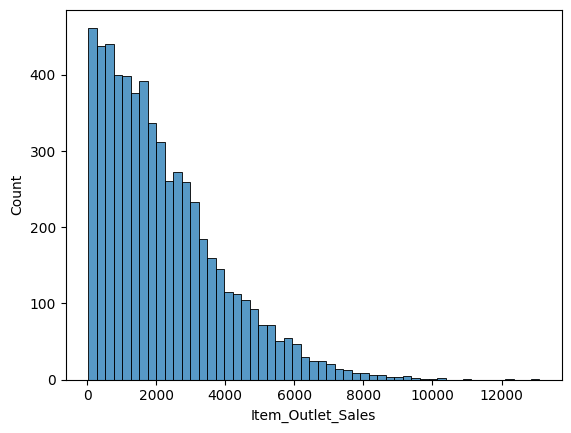

In [ ]:
sns.histplot(y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
import xgboost as xgb

##***`Grid Searchcv`***

In [ ]:
rf = RandomForestRegressor(random_state=SEED)
gb = GradientBoostingRegressor(random_state=SEED)
xgr = xgb.XGBRegressor(objective='reg:squarederror' ,random_state=SEED )

In [ ]:
!pip install shap
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 12.1 MB/s eta 0:00:00


In [ ]:
# Example parameters for GridSearchCV
param_grid_rf_new = {
    'n_estimators': [50, 100, 150],      # Number of boosting stages (trees)
    'max_depth': [None, 5, 10, 15]       # Maximum depth of the individual trees
}

param_grid_xgb_new = {
    'learning_rate': [0.01, 0.05, 0.1],       # Learning rate (shrinkage) for each boosting iteration
    'max_depth': [None, 5, 10, 15],           # Maximum depth of the individual trees
    'n_estimators': [50, 100, 150],           # Number of boosting stages (trees)
    'subsample': [0.8, 0.9, 1.0]              # Fraction of samples used for fitting the individual trees
}

param_grid_gb_new = {
    'learning_rate': [0.05, 0.1, 0.2],       # Learning rate (shrinkage) for each boosting iteration
    'n_estimators': [50, 100, 150],          # Number of boosting stages (trees)
    'max_depth': [None, 5, 10, 15],          # Maximum depth of the individual trees
    'subsample': [0.8, 0.9, 1.0],            # Fraction of samples used for fitting the individual trees
}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score , mean_squared_error

def find_best_model_and_eval(model, param_grid, X_train, y_train, cv=5):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Now, you can fit the best model on the entire training dataset
    best_model.fit(X_train, y_train)

    # Predict the target variable on the test dataset
    y_pred = best_model.predict(X_test_final)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score of the best model:", r2)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("RMSE of the best model:", rmse)

    # Calculate standard deviation between predicted and actual outputs
    std_deviation = np.std(y_pred - y_test)

    print("Standard Deviation:", std_deviation)

    # Compute SHAP values
    explainer = shap.Explainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # Create summary plot
    shap.summary_plot(shap_values, X_train, show=False)
    plt.show()



R-squared score of the best model: 0.6030457389959025
RMSE of the best model: 1054.45071754493
Standard Deviation: 1054.0740731617252


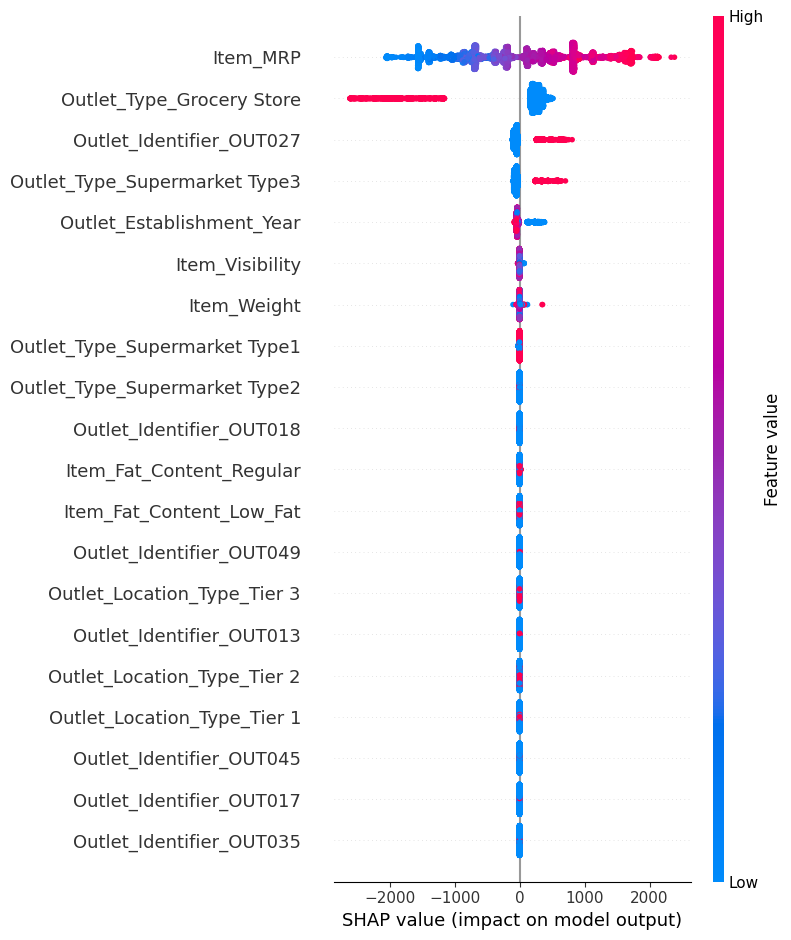

In [ ]:
find_best_model_and_eval(model = rf, param_grid=param_grid_rf_new, X_train = X_train_final, y_train = y_train)

R-squared score of the best model: 0.6025752706900327
RMSE of the best model: 1055.0753975003818
Standard Deviation: 1054.536115913484


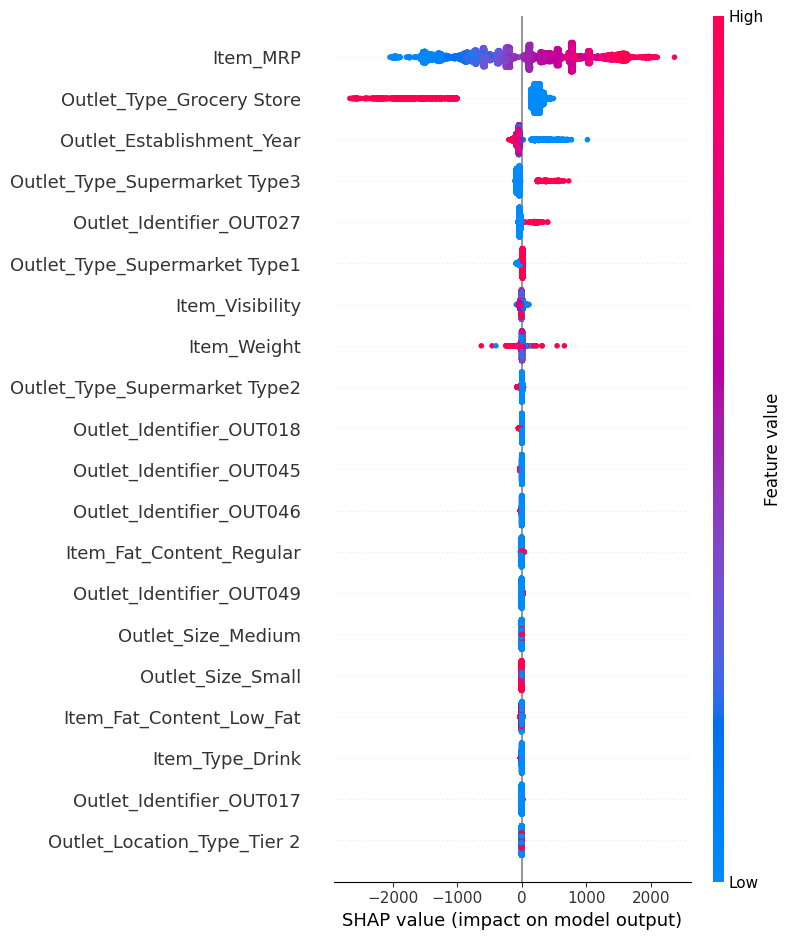

In [ ]:
find_best_model_and_eval(model = gb, param_grid=param_grid_gb_new, X_train = X_train_final, y_train = y_train)

R-squared score of the best model: 0.6011283297736503
RMSE of the best model: 1056.9943077197008
Standard Deviation: 1056.4749403772385


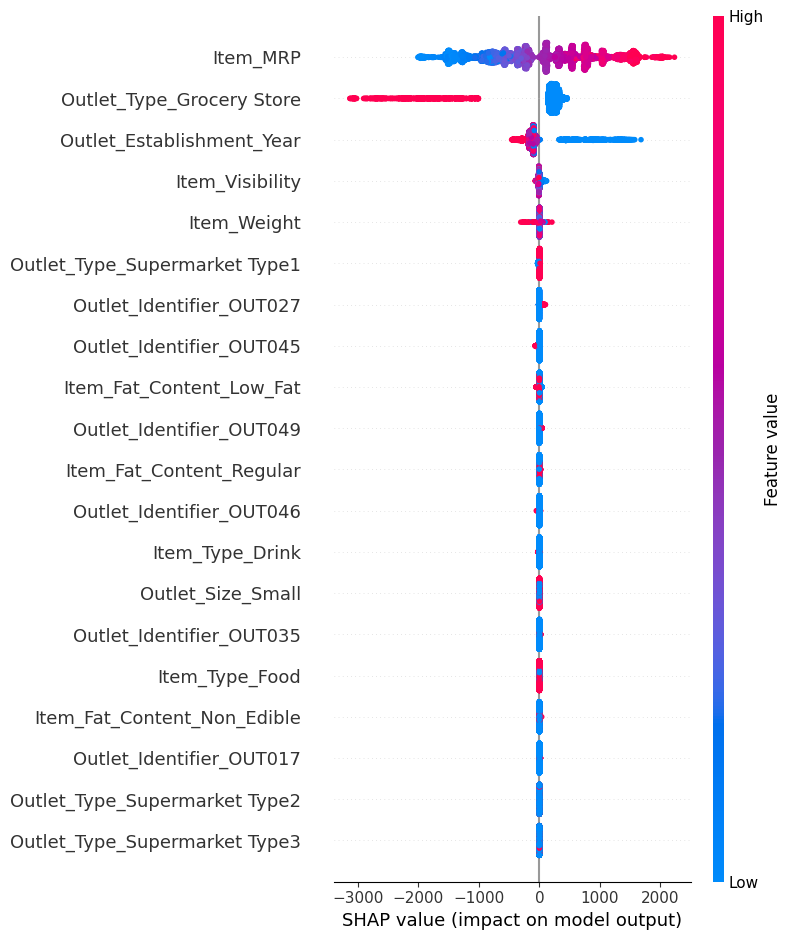

In [ ]:
find_best_model_and_eval(model = xgr, param_grid=param_grid_xgb_new, X_train = X_train_final, y_train = y_train)

#**Conclusion :-**
After evaluating the performance of RandomForestRegressor, Gradient Boosting, and XGBoost models on the given dataset, it is evident that the **RandomForestRegressor** model outperformed the other models. The RandomForestRegressor model achieved an **R-squared score** of **0.603**, indicating that approximately **60.3%** of the variance in the target variable is explained by the model. Additionally, the model attained an **RMSE (Root Mean Squared Error)** of **1054.45** and a **Standard Deviation** of **1054.07**. The RMSE and Standard Deviation values are close, suggesting that the errors made by the model are consistent in magnitude. A small difference between RMSE and standard deviation indicates that the model's performance is reliable and stable across different data points.The model is likely generalizing well to unseen data.
## RandomForest :-


*   Higher Value of Item_MRP is impacting positively on sales of item.
*   Lower Value of Outlet_Establishment_Year impacts positively on sales of item.

This performance indicates that the RandomForestRegressor model provided a reliable and accurate prediction of the target variable compared to Gradient Boosting and XGBoost models .
